In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

sns.set()
sns.set_style('whitegrid')
sns.set_color_codes()

In [ ]:
train_trans = pd.read_csv("/content/drive/MyDrive/프로젝트/train_transaction.csv")
train_idf = pd.read_csv("/content/drive/MyDrive/프로젝트/train_identity.csv")
test_trans = pd.read_csv("/content/drive/MyDrive/프로젝트/test_transaction.csv")
test_idf = pd.read_csv("/content/drive/MyDrive/프로젝트/test_identity.csv")

In [ ]:
train_data = pd.merge(train_trans, train_idf, how = 'left', on = 'TransactionID')
test_data = pd.merge(test_trans, test_idf, how = 'left', on = 'TransactionID')

In [ ]:
train_data_cols = [col for col in train_data.columns if not col.startswith('V')]

In [ ]:
test_data_cols = [col for col in test_data.columns if not col.startswith('V')]

In [ ]:
train_data = train_data[train_data_cols]

In [ ]:
test_data = test_data[test_data_cols]

In [ ]:
train_data['TransactionDay'] = train_data['TransactionDT'] // (24 * 60 * 60)

In [ ]:
test_data['TransactionDay'] = test_data['TransactionDT'] // (24 * 60 * 60)

In [ ]:
test_data.columns = [col.replace('-', '_') if 'id' in col else col for col in test_data.columns]

In [ ]:
# D로 시작하고 DeviceInfo와 DeviceType이 아닌 컬럼을 출력
for col in train_data.columns:
    if col.startswith('D') and col not in ['DeviceInfo', 'DeviceType']:
        for i in range(1, 16):
          if i != 9:
            train_data[f'D{i}N'] = train_data['TransactionDay'] - train_data[f'D{i}']

In [ ]:
for col in test_data.columns:
    if col.startswith('D') and col not in ['DeviceInfo', 'DeviceType']:
        for i in range(1, 16):
          if i != 9:
            test_data[f'D{i}N'] = test_data['TransactionDay'] - test_data[f'D{i}']

In [ ]:
train_data.drop(columns = 'AddressChange', inplace = True)

In [ ]:
train_data['AddressChange'] = train_data.groupby('card1')['addr1'].transform(lambda x: x != x.shift()).astype(int)

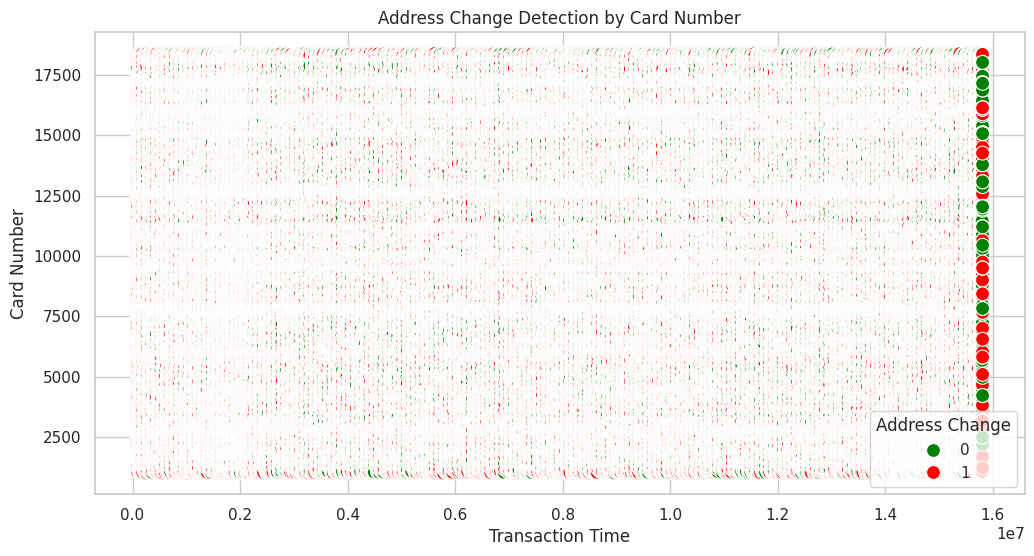

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=train_data, x='TransactionDT', y='card1', hue='AddressChange', palette={True: 'red', False: 'green'}, s=100)
plt.title('Address Change Detection by Card Number')
plt.xlabel('Transaction Time')
plt.ylabel('Card Number')
plt.legend(title='Address Change')
plt.show()

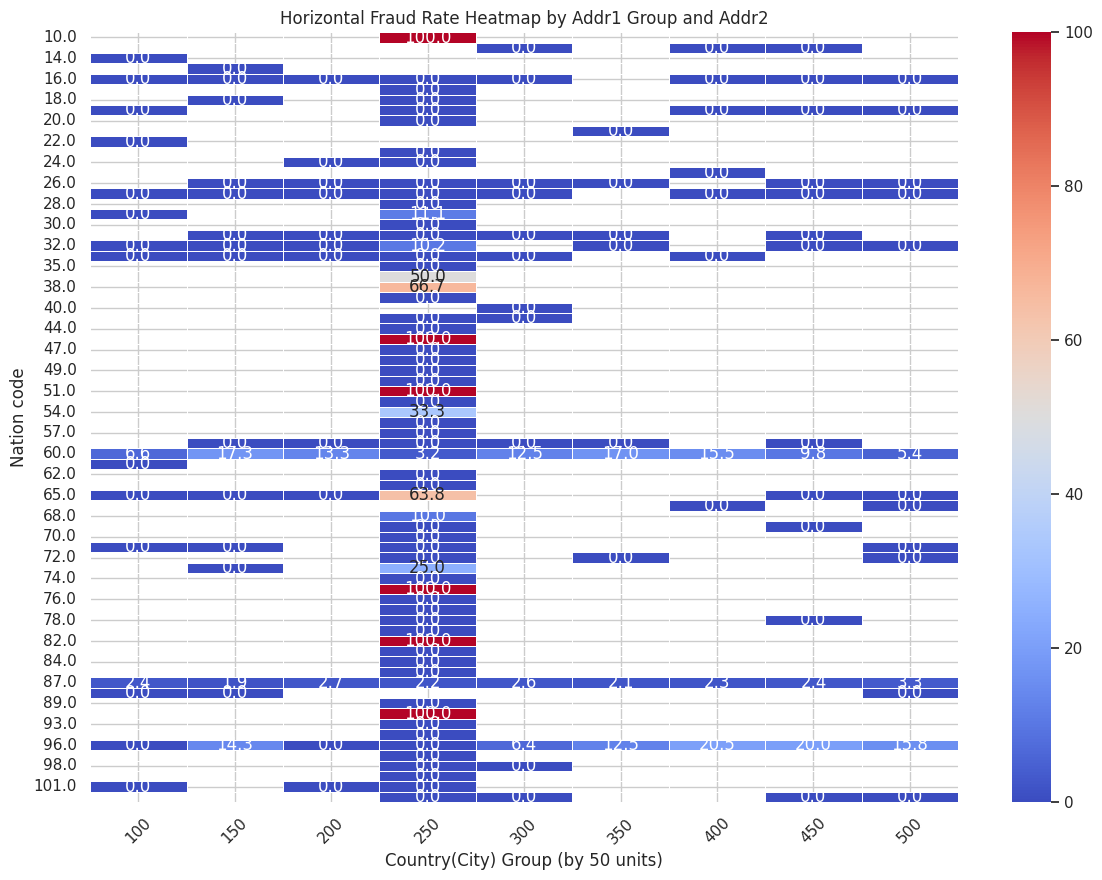

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# train_trans 라는 DataFrame을 이미 로드했다고 가정합니다.

# addr1 값을 50 단위 구간으로 나누기
train_trans['addr1_group'] = pd.cut(train_trans['addr1'], bins=range(100, 600, 50), labels=range(100, 550, 50))

# 필요한 데이터만 필터링
filtered_data = train_trans.dropna(subset=['addr1_group', 'addr2', 'isFraud'])

# addr2와 addr1_group별로 그룹화하고, 각 그룹 내 isFraud = 1의 비율을 계산
grouped_data = filtered_data.groupby(['addr2', 'addr1_group']).agg({
    'isFraud': 'mean'
}).unstack(fill_value=0)['isFraud'] * 100

# Seaborn을 사용한 히트맵 시각화 (수평)
plt.figure(figsize=(14, 10))
sns.heatmap(grouped_data, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Horizontal Fraud Rate Heatmap by Addr1 Group and Addr2')
plt.xlabel('Country(City) Group (by 50 units)')
plt.ylabel('Nation code')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.show()
# 어떤 지역에서 카드 사기의 비율이 어떻게 됐는지 파악

In [ ]:
train_trans[['card1', 'card2', 'card3', 'card4', 'card5', 'card6']].head(300)

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit
5,5937,555.0,150.0,visa,226.0,debit
6,12308,360.0,150.0,visa,166.0,debit
7,12695,490.0,150.0,visa,226.0,debit
8,2803,100.0,150.0,visa,226.0,debit
9,17399,111.0,150.0,mastercard,224.0,debit


In [ ]:
length_count = {}

for card in train_trans['card1']:
    # 숫자를 문자열로 변환하고 길이를 계산
    length = len(str(card))
    if length in length_count:
        length_count[length] += 1
    else:
        length_count[length] = 1

# 결과 출력
length_count

{5: 287325, 4: 303215}

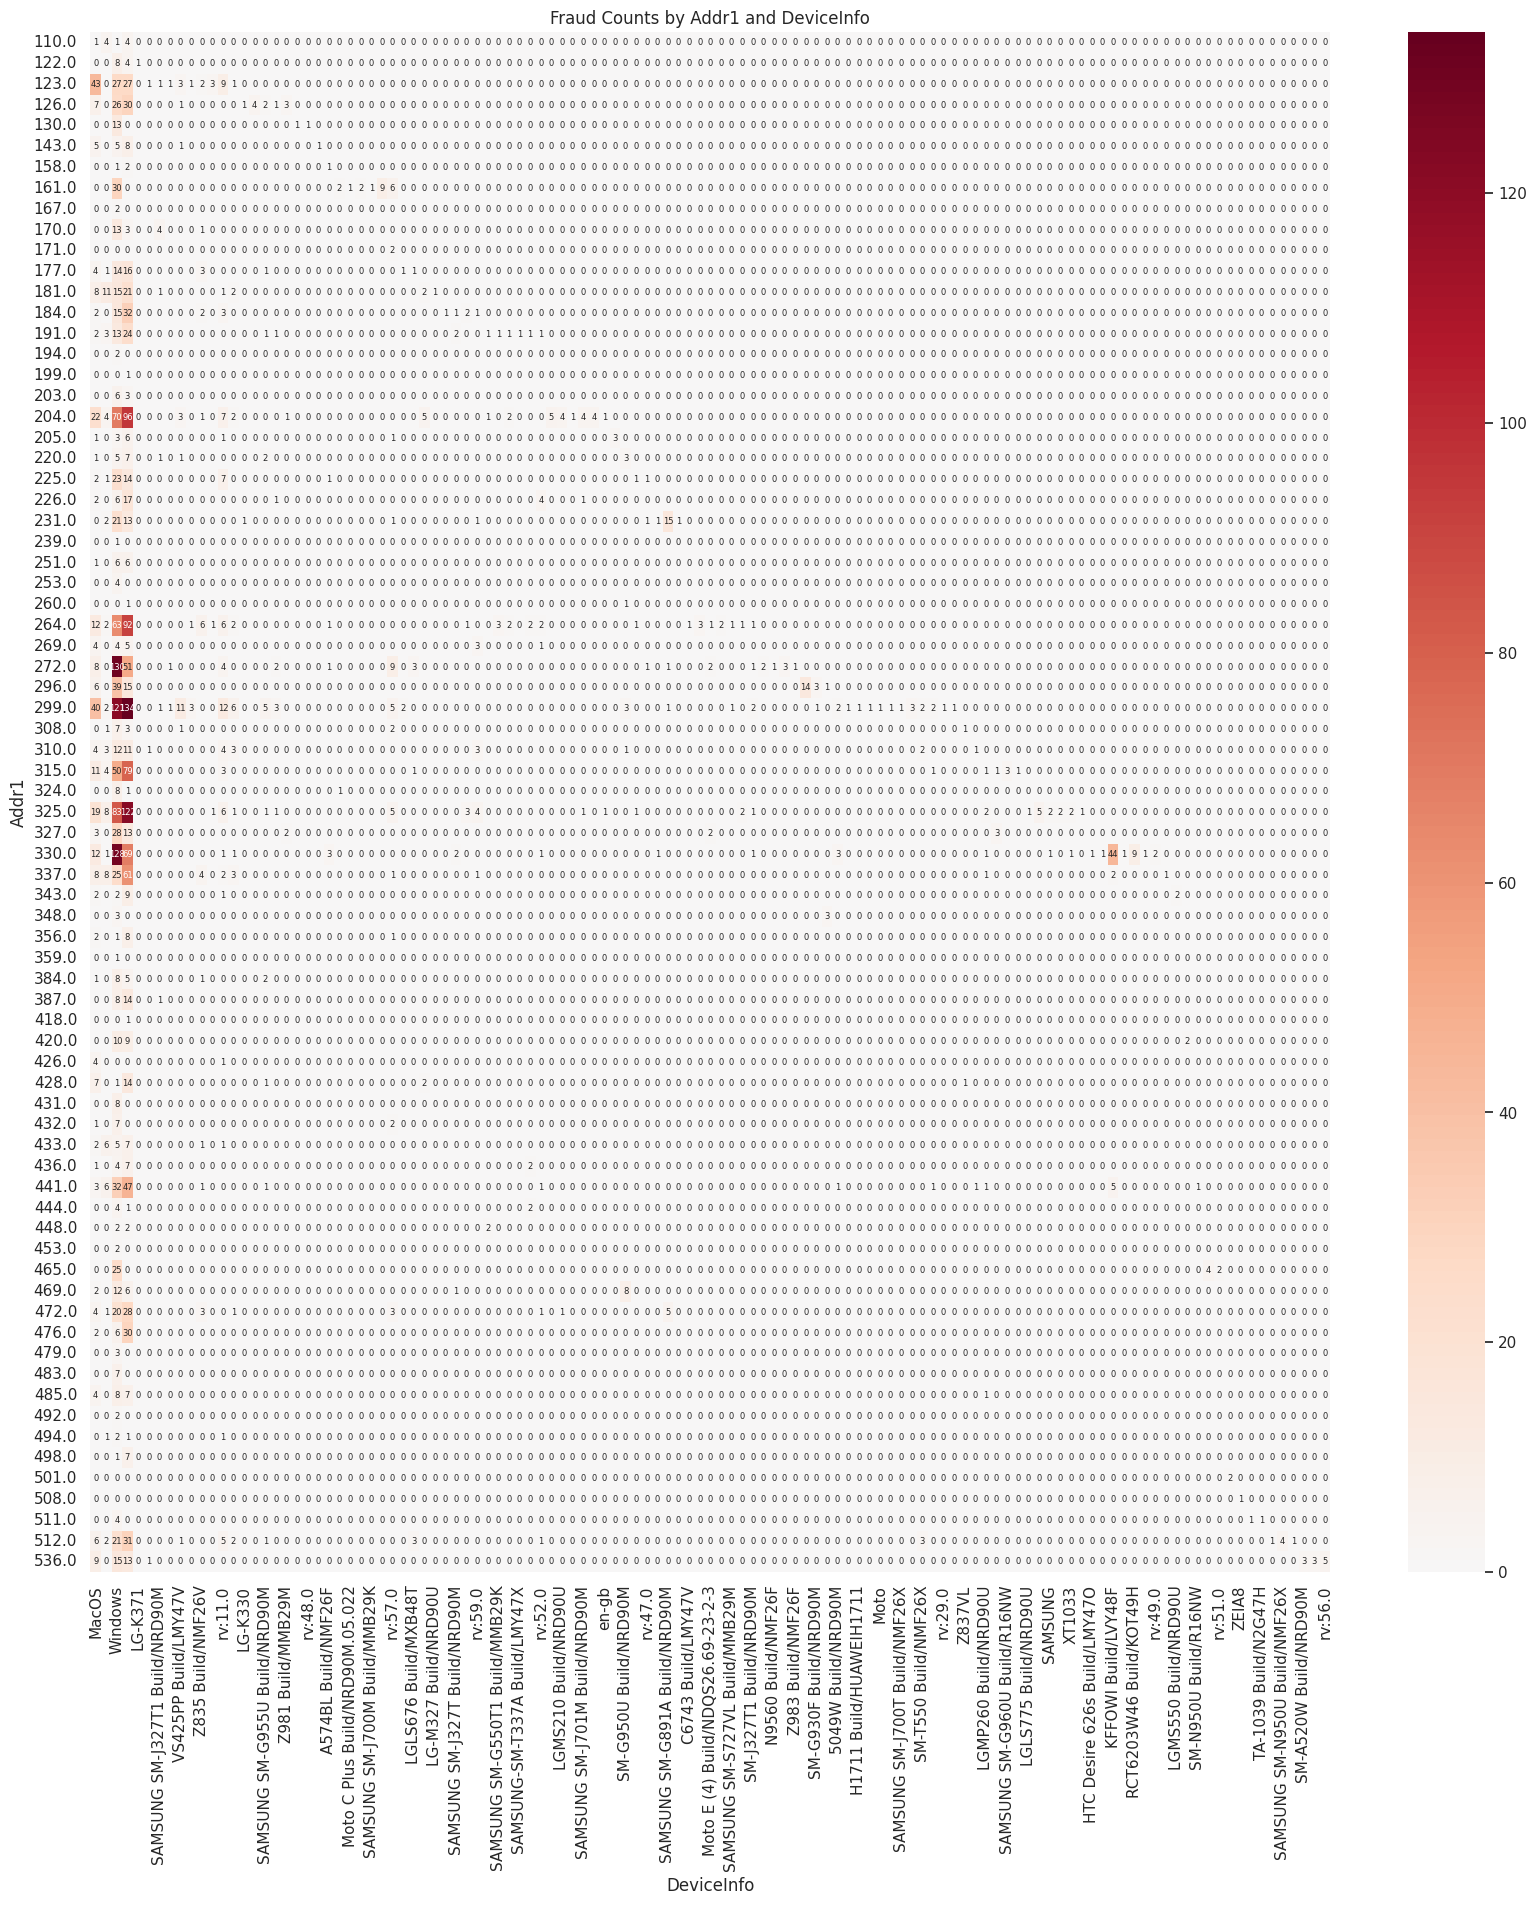

In [ ]:
fraud_data = train_data[train_data['isFraud'] == 1]
fraud_counts = fraud_data.groupby(['addr1', 'DeviceInfo']).size().unstack(fill_value=0)

# 데이터의 크기가 크면 히트맵 시각화를 위해 데이터를 샘플링하거나 집계 수준을 조정
# 여기서는 직접 데이터를 조정하지 않고 모든 데이터를 사용하는 것으로 가정

plt.figure(figsize=(20, 20))  # 크기 조정
# cmap을 'RdBu'로 설정하고, 양의 값이 빨간색 계열로 나타나도록 center 파라미터 조정
sns.heatmap(fraud_counts, annot=True, fmt="d", cmap="RdBu_r", center=0,
            cbar=True, annot_kws={"size": 6})  # annot_kws로 글자 크기 조정
plt.title('Fraud Counts by Addr1 and DeviceInfo')
plt.xlabel('DeviceInfo')
plt.ylabel('Addr1')
plt.xticks(rotation=90)  # DeviceInfo가 많을 경우 레이블 겹침 방지
plt.yticks(rotation=0)  # y축 레이블의 회전을 없앰
plt.show()
# 각 지역에서 어떤os 사용했고 각각 사기 빈도 수

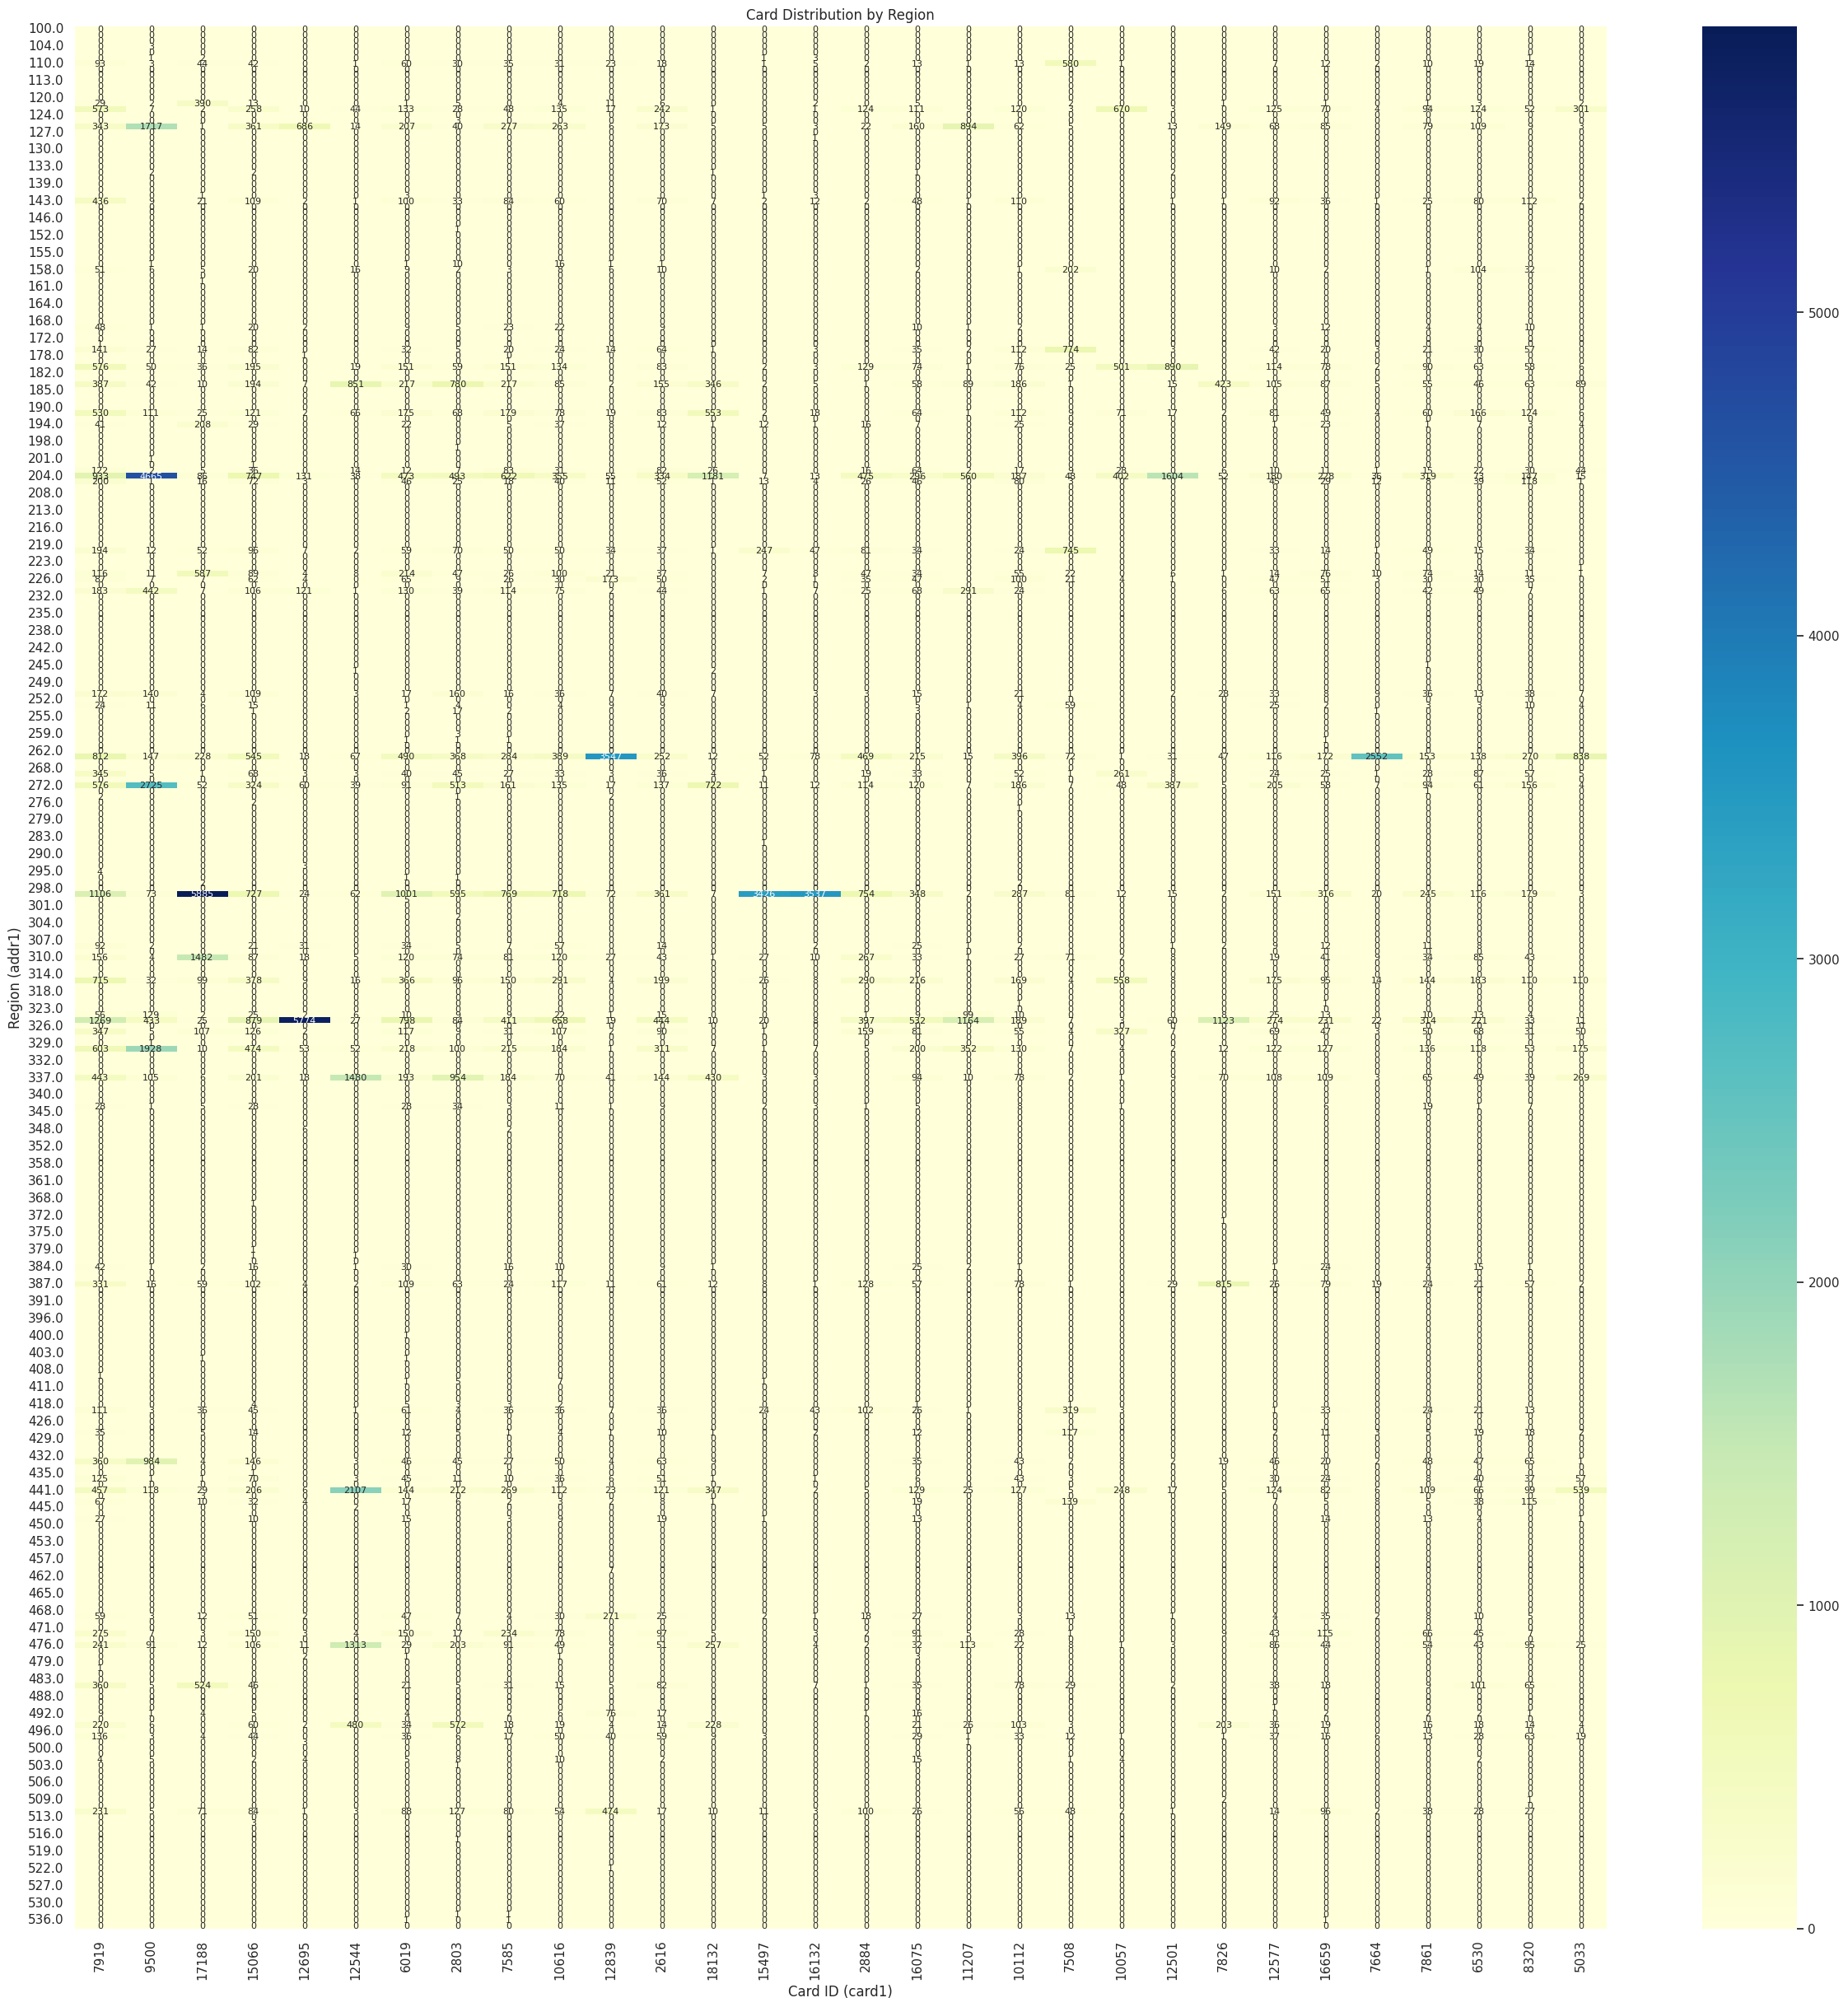

In [ ]:
# addr1과 card1 조합의 빈도 계산
region_card_counts = train_data.groupby(['addr1', 'card1']).size().unstack(fill_value=0)

# 데이터가 매우 많을 수 있으므로, 빈도가 높은 상위 N개의 card1만 시각화
top_cards = region_card_counts.sum(axis=0).nlargest(30).index
region_card_counts = region_card_counts[top_cards]

# 히트맵 생성
plt.figure(figsize=(30, 30))  # 그래프 크기를 더 크게 설정
sns.heatmap(region_card_counts, annot=True, fmt=".0f", cmap="YlGnBu", cbar=True, annot_kws={"size": 8})
plt.title('Card Distribution by Region')
plt.xlabel('Card ID (card1)')
plt.ylabel('Region (addr1)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()
# card1이 카드번호라는 가정하에 각 지역에서 해당 카드 번호가 얼마나 등장하는지 확인하는 그래프

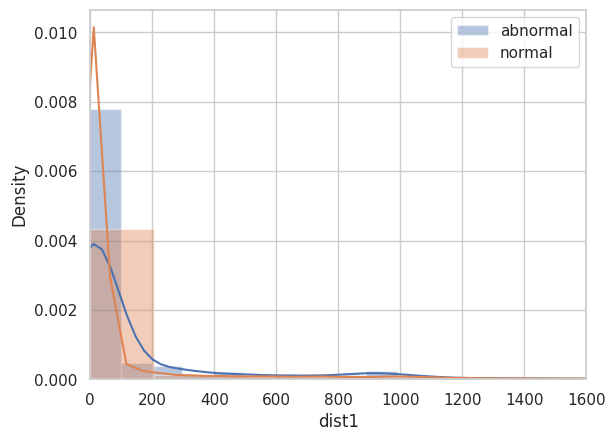

In [ ]:
sns.distplot( train_data[train_data['isFraud']==1]['dist1'], label='abnormal');
plt.xlim(0, 1600)
sns.distplot( train_data[train_data['isFraud']==0]['dist1'], label="normal");
plt.xlim(0, 1600)
plt.legend();

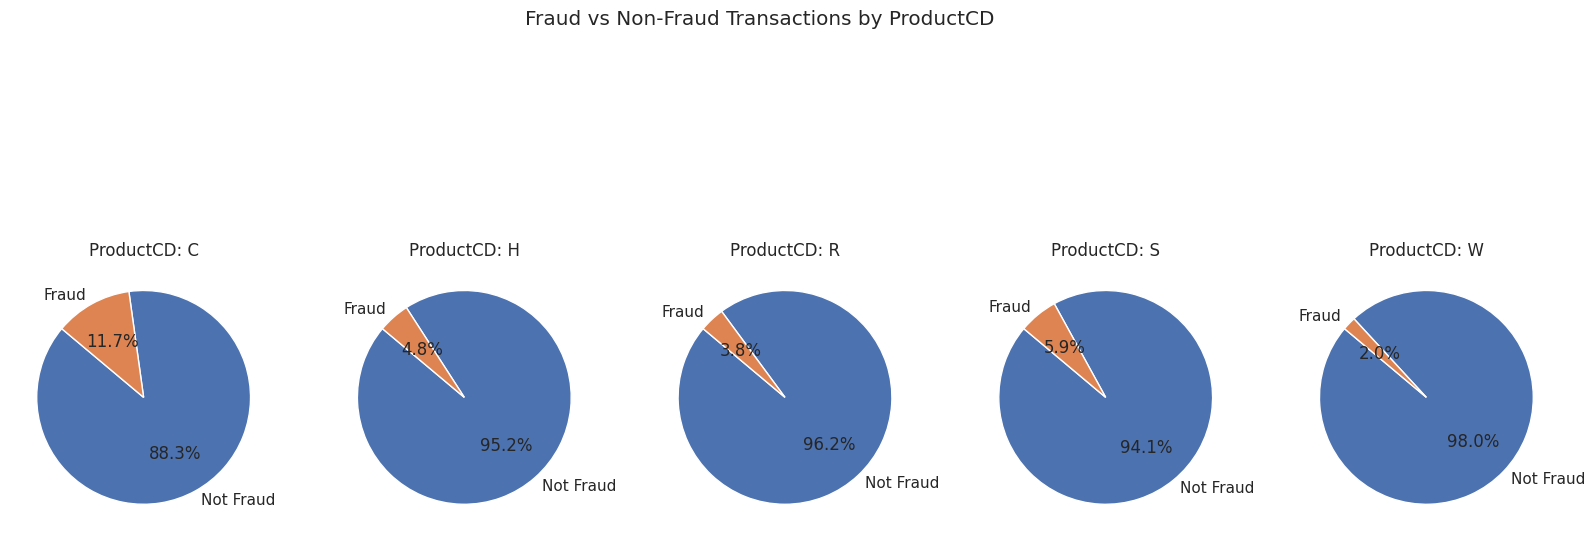

In [ ]:
product_fraud_counts = train_data.groupby('ProductCD')['isFraud'].value_counts(normalize=True).unstack().fillna(0)
product_fraud_counts.fillna(0, inplace=True)

# 파이 그래프 시각화
fig, axes = plt.subplots(1, len(product_fraud_counts), figsize=(20, 8))

for i, (product, counts) in enumerate(product_fraud_counts.iterrows()):
    axes[i].pie(counts, labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'ProductCD: {product}')

plt.suptitle('Fraud vs Non-Fraud Transactions by ProductCD')
plt.show()

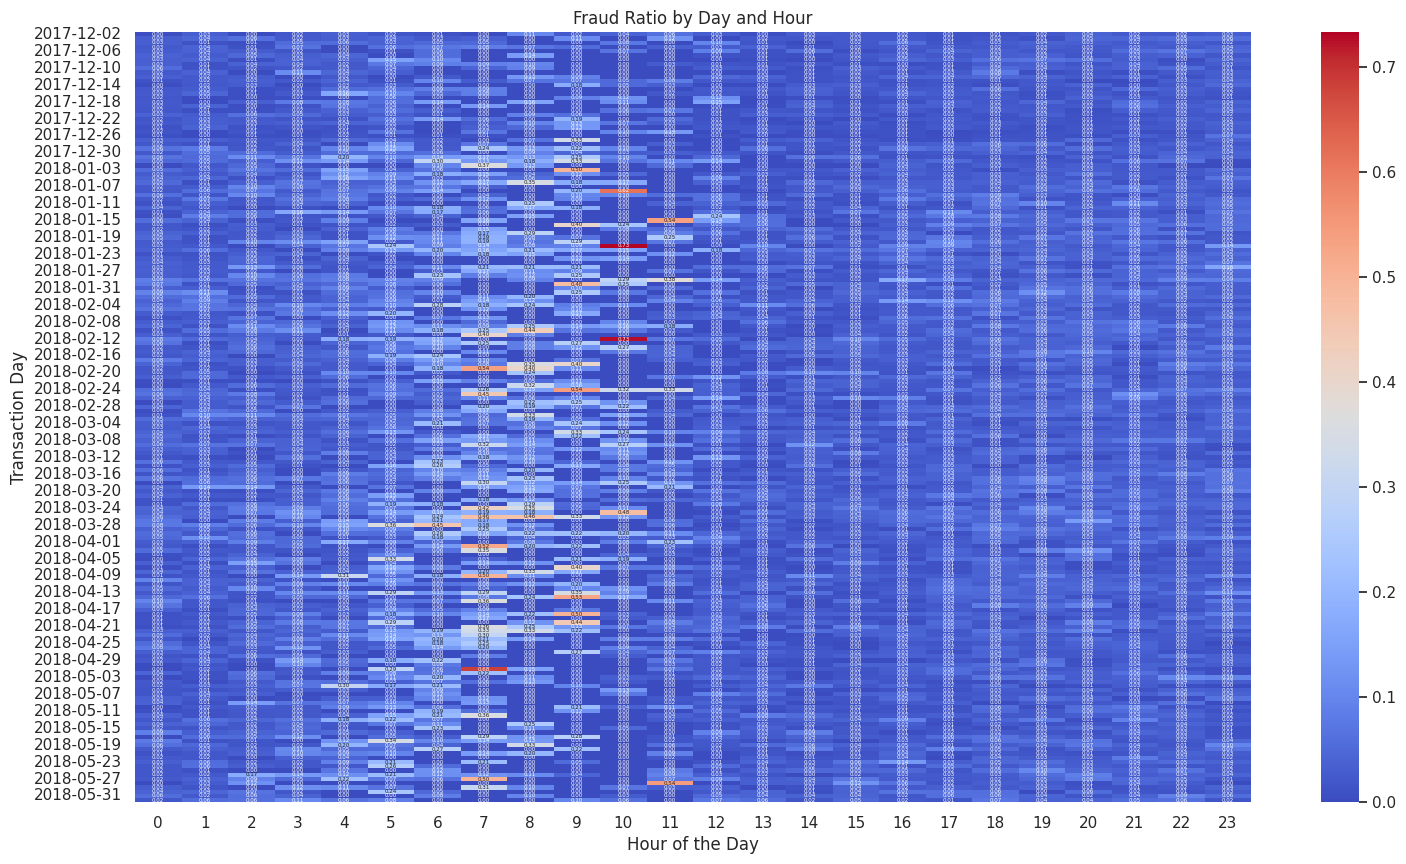

In [ ]:
from datetime import datetime, timedelta
# TransactionDT를 날짜와 시간 형식으로 변환
start_date = datetime(2017, 12, 1)
train_data['TransactionDate'] = train_data['TransactionDT'].apply(lambda x: start_date + timedelta(seconds=x))

# TransactionDate에서 날짜와 시간을 추출
train_data['TransactionDay'] = train_data['TransactionDate'].dt.date
train_data['TransactionHour'] = train_data['TransactionDate'].dt.hour

# 날짜와 시간별로 그룹화하여 사기 거래 비율 계산
hourly_fraud_ratio = train_data.groupby(['TransactionDay', 'TransactionHour'])['isFraud'].mean().unstack()

# 히트맵 시각화
plt.figure(figsize=(18, 10))
sns.heatmap(hourly_fraud_ratio, cmap='coolwarm', annot=True, fmt='.2f',annot_kws={"size": 4})
plt.title('Fraud Ratio by Day and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Day')
plt.show()

In [ ]:
train_data2 = train_data.copy()

In [ ]:
train_data2.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,TransactionDay,D1N,D2N,D3N,D4N,D5N,D6N,D7N,D8N,D10N,D11N,D12N,D13N,D14N,D15N
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-13.0,NaN,-12.0,NaN,NaN,NaN,NaN,NaN,-12.0,-12.0,NaN,NaN,NaN,1.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,F,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,-314.0,NaN,NaN,NaN,-314.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0,NaN,NaN,NaN,M0,T,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,-111.0,-111.0,1.0,-93.0,1.0,NaN,NaN,NaN,-83.0,NaN,NaN,NaN,NaN,-110.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_data2 = test_data.copy()

In [ ]:
def encode_FE(df1, df2, cols):
    for col in cols:
        df = pd.concat([df1[col],df2[col]])
        vc = df.value_counts(dropna=True, normalize=True).to_dict()
        vc[-1] = -1
        nm = col+'_FE'
        df1[nm] = df1[col].map(vc)
        df1[nm] = df1[nm].astype('float32')
        df2[nm] = df2[col].map(vc)
        df2[nm] = df2[nm].astype('float32')
        print(nm,', ',end='')

In [ ]:
def encode_LE(col,train=train_data2,test=test_data2,verbose=True):
    df_comb = pd.concat([train[col],test[col]],axis=0)
    df_comb,_ = df_comb.factorize(sort=True)
    nm = col
    if df_comb.max()>32000:
        train[nm] = df_comb[:len(train)].astype('int32')
        test[nm] = df_comb[len(train):].astype('int32')
    else:
        train[nm] = df_comb[:len(train)].astype('int16')
        test[nm] = df_comb[len(train):].astype('int16')
    del df_comb; x=gc.collect()
    if verbose: print(nm,', ',end='')

In [ ]:
def encode_AG(main_columns, uids, aggregations=['mean'], train_df=train_data2, test_df=test_data2,
              fillna=True, usena=False):
    for main_column in main_columns:
        for col in uids:
            for agg_type in aggregations:
                new_col_name = main_column+'_'+col+'_'+agg_type
                temp_df = pd.concat([train_df[[col, main_column]], test_df[[col,main_column]]])
                if usena: temp_df.loc[temp_df[main_column]==-1,main_column] = np.nan
                temp_df = temp_df.groupby([col])[main_column].agg([agg_type]).reset_index().rename(
                                                        columns={agg_type: new_col_name})

                temp_df.index = list(temp_df[col])
                temp_df = temp_df[new_col_name].to_dict()

                train_df[new_col_name] = train_df[col].map(temp_df).astype('float32')
                test_df[new_col_name]  = test_df[col].map(temp_df).astype('float32')

                if fillna:
                    train_df[new_col_name].fillna(-1,inplace=True)
                    test_df[new_col_name].fillna(-1,inplace=True)

                print("'"+new_col_name+"'",', ',end='')

In [ ]:
def encode_CB(col1,col2,df1=train_data2,df2=test_data2):
    nm = col1+'_'+col2
    df1[nm] = df1[col1].astype(str)+'_'+df1[col2].astype(str)
    df2[nm] = df2[col1].astype(str)+'_'+df2[col2].astype(str)
    encode_LE(nm,verbose=False)
    print(nm,', ',end='')

In [ ]:
def encode_AG2(main_columns, uids, train_df=train_data2, test_df=test_data2):
    for main_column in main_columns:
        for col in uids:
            comb = pd.concat([train_df[[col, main_column]],test_df[[col, main_column]]],axis=0)
            mp = comb.groupby(col)[main_column].agg(['nunique'])['nunique'].to_dict()
            train_df[col+'_'+main_column+'_ct'] = train_df[col].map(mp).astype('float32')
            test_df[col+'_'+main_column+'_ct'] = test_df[col].map(mp).astype('float32')
            print(col+'_'+main_column+'_ct, ',end='')

In [ ]:
import datetime
START_DATE = datetime.datetime.strptime('2017-11-30', '%Y-%m-%d')
train_data2['DT_M'] = train_data2['TransactionDT'].apply(lambda x: (START_DATE + datetime.timedelta(seconds = x)))
test_data2['DT_M'] = test_data2['TransactionDT'].apply(lambda x: (START_DATE + datetime.timedelta(seconds = x)))
train_data2['DT_M'] = (train_data2['DT_M'].dt.year-2017)*12 + train_data2['DT_M'].dt.month
test_data2['DT_M'] = (test_data2['DT_M'].dt.year-2017)*12 + test_data2['DT_M'].dt.month

In [ ]:
train['isFraud'] = train_data['isFraud']

In [ ]:
train = train_data2
test = test_data2

In [ ]:
# 그룹화 및 집계
grouped = train.groupby(['ProductCD'])['dist1'].agg(['mean', 'std']).reset_index()
grouped2 = test.groupby(['ProductCD'])['dist1'].agg(['mean', 'std']).reset_index()

# 컬럼 이름 변경
grouped.columns = ['ProductCD', 'dist1_mean', 'dist1_std']
grouped2.columns = ['ProductCD', 'dist1_mean', 'dist1_std']

In [ ]:
train = test.merge(grouped, on=['card1', 'addr1', 'DT_M'], how='left')
test = test.merge(grouped2, on=['card1', 'addr1', 'DT_M'], how='left')

In [ ]:
train.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,TransactionDay,D1N,D2N,D3N,D4N,D5N,D6N,D7N,D8N,D10N,D11N,D12N,D13N,D14N,D15N,DT_M,is_this_transaction_in_test_data,TransactionAmt_mean,TransactionAmt_std,C13_mean,C13_std,dist1_mean,dist1_std
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,T,T,F,NaN,NaN,F,T,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213,-206.0,-206.0,186.0,-185.0,186.0,NaN,NaN,NaN,-205.0,10.0,NaN,NaN,NaN,-196.0,19,test,130.225000,183.634344,60.875000,51.747843,131.428571,209.249339
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,634.0,NaN,NaN,NaN,634.0,T,F,F,M0,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213,64.0,64.0,206.0,-421.0,206.0,NaN,NaN,NaN,-18.0,-421.0,NaN,NaN,NaN,-421.0,19,test,187.031240,434.174640,37.860465,115.645724,21.057143,100.390237
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,136.0,NaN,NaN,NaN,97.0,T,T,F,M0,F,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213,76.0,76.0,203.0,116.0,203.0,NaN,NaN,NaN,77.0,77.0,NaN,NaN,NaN,116.0,19,test,187.200000,118.512636,15.833333,10.419533,1977.250000,1315.500000
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,242.0,NaN,NaN,NaN,242.0,T,T,T,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213,171.0,171.0,172.0,-29.0,172.0,NaN,NaN,NaN,-29.0,-29.0,NaN,NaN,NaN,-29.0,19,test,167.983333,98.035303,3.166667,3.371449,17.000000,0.000000
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN,NaN,22.0,T,T,T,NaN,NaN,F,F,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213,191.0,191.0,213.0,191.0,213.0,NaN,NaN,NaN,191.0,191.0,NaN,NaN,NaN,191.0,19,test,109.256135,168.120326,44.723926,144.642142,77.989247,231.253789


In [ ]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,TransactionDay,D1N,D2N,D3N,D4N,D5N,D6N,D7N,D8N,D10N,D11N,D12N,D13N,D14N,D15N,DT_M,is_this_transaction_in_test_data,TransactionAmt_mean,TransactionAmt_std,C13_mean,C13_std,dist1_mean,dist1_std
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,T,T,F,NaN,NaN,F,T,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213,-206.0,-206.0,186.0,-185.0,186.0,NaN,NaN,NaN,-205.0,10.0,NaN,NaN,NaN,-196.0,19,test,130.225000,183.634344,60.875000,51.747843,131.428571,209.249339
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,634.0,NaN,NaN,NaN,634.0,T,F,F,M0,NaN,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213,64.0,64.0,206.0,-421.0,206.0,NaN,NaN,NaN,-18.0,-421.0,NaN,NaN,NaN,-421.0,19,test,187.031240,434.174640,37.860465,115.645724,21.057143,100.390237
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,136.0,NaN,NaN,NaN,97.0,T,T,F,M0,F,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213,76.0,76.0,203.0,116.0,203.0,NaN,NaN,NaN,77.0,77.0,NaN,NaN,NaN,116.0,19,test,187.200000,118.512636,15.833333,10.419533,1977.250000,1315.500000
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,242.0,NaN,NaN,NaN,242.0,T,T,T,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213,171.0,171.0,172.0,-29.0,172.0,NaN,NaN,NaN,-29.0,-29.0,NaN,NaN,NaN,-29.0,19,test,167.983333,98.035303,3.166667,3.371449,17.000000,0.000000
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN,NaN,22.0,T,T,T,NaN,NaN,F,F,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213,191.0,191.0,213.0,191.0,213.0,NaN,NaN,NaN,191.0,191.0,NaN,NaN,NaN,191.0,19,test,109.256135,168.120326,44.723926,144.642142,77.989247,231.253789


In [ ]:
id_feature = [ c for c in train.columns if c.find('id_') !=-1]
card_feature = [ c for c in train.columns if c.find('card') !=-1]
C_feature = [ c for c in train.columns if c.find('C') !=-1 and c != 'ProductCD']
D_feature = [ c for c in train.columns if c.find('n') == -1 and c.find('D') !=-1 and c not in ['ProductCD','TransactionID','TransactionDT','DeviceType','DeviceInfo','TransactionDay', 'DT_M']]
Dn_feature = [ c for c in train.columns if c.find('n') != -1 and c.find('D') !=-1 and c not in ['ProductCD','TransactionID','TransactionDT','DeviceType','DeviceInfo','TransactionDay', 'DT_M']]
M_feature = [ c for c in train.columns if c.find('M') !=-1]

In [ ]:
train['is_this_transaction_in_test_data'] = 'train'
test['is_this_transaction_in_test_data'] = 'test'
total_df = pd.concat([train, test], axis=0, sort=False)

In [ ]:
params = {'num_leaves': 491,
          'min_child_weight': 0.03454472573214212,
          'feature_fraction': 0.3797454081646243,
          'bagging_fraction': 0.4181193142567742,
          'min_data_in_leaf': 106,
          'objective': 'binary',
          'max_depth': -1,
          'learning_rate': 0.006883242363721497,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.3899927210061127,
          'reg_lambda': 0.6485237330340494,
          'random_state': 47
         }

In [ ]:
import lightgbm as lgb
from sklearn import model_selection

target = total_df['is_this_transaction_in_test_data'].values
train_, test_ = model_selection.train_test_split(total_df, test_size=0.33, random_state=42, shuffle=True)

train_y = train['is_this_transaction_in_test_data'].values
test_y = test['is_this_transaction_in_test_data'].values

# TransactionDT ~ M columns
features = np.append(['TransactionDT', 'TransactionAmt', 'ProductCD'], card_feature + Dn_feature + C_feature)
train_2 = lgb.Dataset(train[features], label=train_y)
test_2 = lgb.Dataset(test[features], label=test_y)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
total_df['ProductCD'] = le.fit_transform(total_df['ProductCD'])

In [ ]:
num_round = 100
clf = lgb.train(params, train_2, num_round, valid_sets = [train_2, test_2], callbacks=[
                lgb.early_stopping(stopping_rounds=50),
                lgb.log_evaluation(period=50)])

ValueError: pandas dtypes must be int, float or bool.
Fields with bad pandas dtypes: ProductCD: object, card4: object, card6: object

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importance(),features)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False).head(20))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()